<a href="https://colab.research.google.com/github/noprisigit/DenseNet121/blob/main/DenseNet121%20-%20Tanpa%20Kelas%20Normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cervical Lesion Classification with ResNet50 in Google Colab

## Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

## Step 2: Extract ZIP Dataset from Google Drive
import zipfile
import os

# zip_path = '/content/drive/MyDrive/dataset-swedesh-score.zip'  # Ganti path ini sesuai lokasi ZIP Anda
# extract_path = '/content/dataset-swedesh-score'

# if not os.path.exists(extract_path):
#     with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#         zip_ref.extractall(extract_path)
#     print("Dataset extracted successfully.")
# else:
#     print("Dataset already extracted.")
!unzip '/content/drive/MyDrive/dataset-swedesh-score-tanpa-normal.zip'

Streaming output truncated to the last 5000 lines.
  inflating: dataset-swedesh-score-tanpa-normal/train/CIN 3/AAFS07_aug55.jpg  
  inflating: dataset-swedesh-score-tanpa-normal/train/CIN 3/AAFS07_aug56.jpg  
  inflating: dataset-swedesh-score-tanpa-normal/train/CIN 3/AAFS07_aug57.jpg  
  inflating: dataset-swedesh-score-tanpa-normal/train/CIN 3/AAFS07_aug58.jpg  
  inflating: dataset-swedesh-score-tanpa-normal/train/CIN 3/AAFS07_aug59.jpg  
  inflating: dataset-swedesh-score-tanpa-normal/train/CIN 3/AAFS07_aug6.jpg  
  inflating: dataset-swedesh-score-tanpa-normal/train/CIN 3/AAFS07_aug60.jpg  
  inflating: dataset-swedesh-score-tanpa-normal/train/CIN 3/AAFS07_aug61.jpg  
  inflating: dataset-swedesh-score-tanpa-normal/train/CIN 3/AAFS07_aug62.jpg  
  inflating: dataset-swedesh-score-tanpa-normal/train/CIN 3/AAFS07_aug63.jpg  
  inflating: dataset-swedesh-score-tanpa-normal/train/CIN 3/AAFS07_aug64.jpg  
  inflating: dataset-swedesh-score-tanpa-normal/train/CIN 3/AAFS07_aug65.jpg  
  

In [ ]:
## Step 3: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import itertools
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize

## Step 4: Define Paths and Parameters
data_dir = '/content/dataset-swedesh-score-tanpa-normal'
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')
img_size = (224, 224)
batch_size = 32
n_classes = 3
class_names = ['CIN 1', 'CIN 2', 'CIN 3']

In [ ]:
## Step 5: Data Generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 19624 images belonging to 3 classes.
Found 141 images belonging to 3 classes.


In [ ]:
## Step 6: Build Model with Pretrained
base_model = tf.keras.applications.DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(n_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile model
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9, decay=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
## Step 7: Train Model
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=val_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 119s 142ms/step - accuracy: 0.5707 - loss: 0.9075 - val_accuracy: 0.6383 - val_loss: 1.0563
Epoch 2/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 86s 80ms/step - accuracy: 0.7910 - loss: 0.5214 - val_accuracy: 0.6383 - val_loss: 1.1538
Epoch 3/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 48s 78ms/step - accuracy: 0.8621 - loss: 0.3702 - val_accuracy: 0.6383 - val_loss: 1.1725
Epoch 4/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.9051 - loss: 0.2864 - val_accuracy: 0.6454 - val_loss: 1.2460
Epoch 5/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 48s 78ms/step - accuracy: 0.9285 - loss: 0.2259 - val_accuracy: 0.6525 - val_loss: 1.3371
Epoch 6/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 49s 80ms/step - accuracy: 0.9429 - loss: 0.1832 - val_accuracy: 0.6809 - val_loss: 1.3274
Epoch 7/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 48s 79ms/step - accuracy: 0.9539 - loss: 0.1558 - val_accuracy: 0.6738 - val_loss: 1.3707
Epoch 8/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 49s 80ms/step - accuracy: 0.9577 - loss:

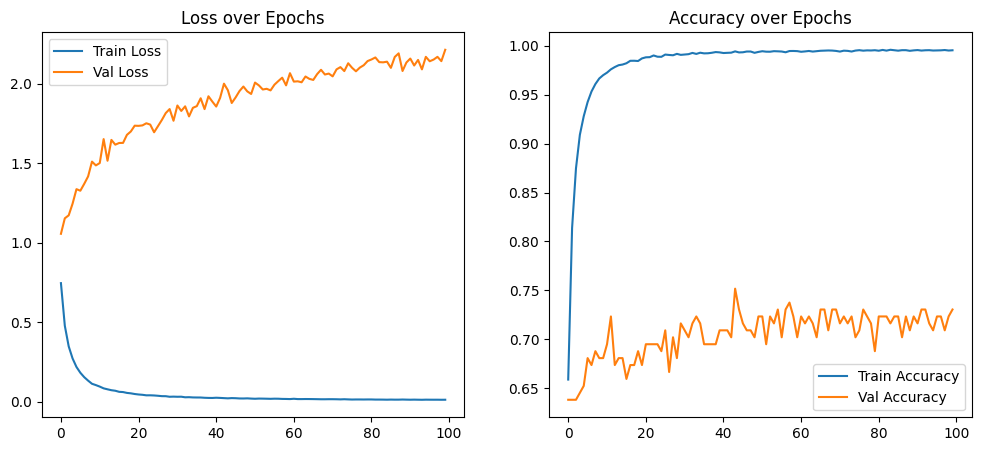

In [ ]:
## Step 8: Plot Loss and Accuracy
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step


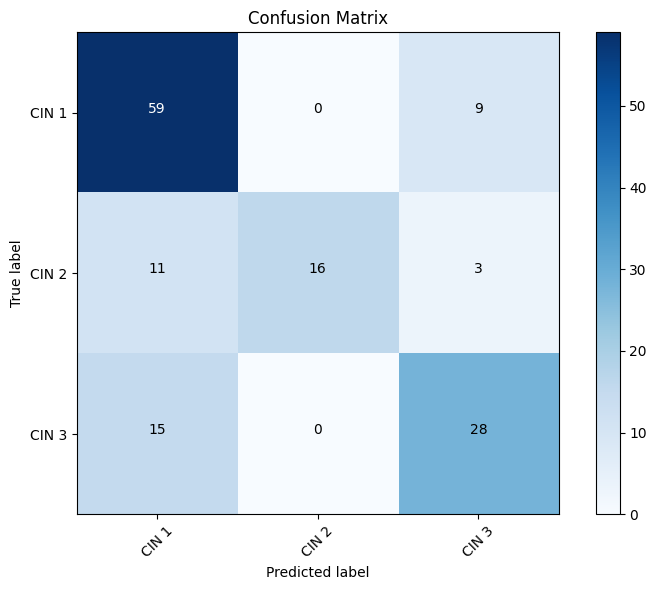

              precision    recall  f1-score   support

       CIN 1       0.69      0.87      0.77        68
       CIN 2       1.00      0.53      0.70        30
       CIN 3       0.70      0.65      0.67        43

    accuracy                           0.73       141
   macro avg       0.80      0.68      0.71       141
weighted avg       0.76      0.73      0.73       141



In [ ]:
## Step 9: Confusion Matrix and Classification Report
# Predict
val_generator.reset()
preds = model.predict(val_generator)
y_pred = np.argmax(preds, axis=1)
y_true = val_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Classification report
print(classification_report(y_true, y_pred, target_names=class_names))

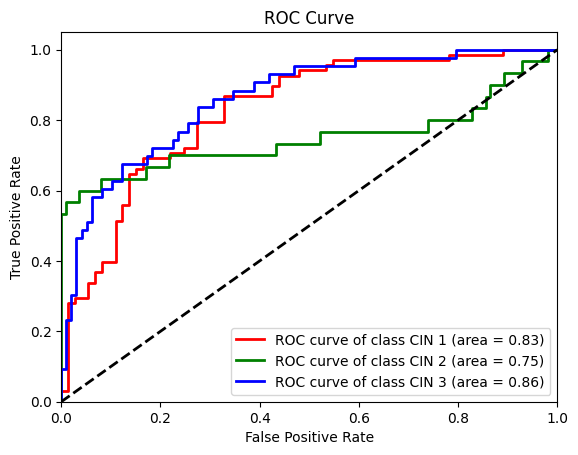

In [ ]:
## Step 10: ROC Curve
y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], preds[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve
plt.figure()
colors = ['red', 'green', 'blue', 'purple']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()